# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**AI-generated caution**: This notebook was created using AI-based techniques and has not undergone complete verification.
Exercise caution when interpreting the results.

## Overview
This notebook aims to explore Dandiset 001375, focusing on the disruption of septal gabaergic activity using DREADDs and its impact on hippocampal and neocortical activity.

Dandiset 001375 is titled: "Septum GABA disruption with DREADDs" and is open access licensed under CC-BY-4.0.
The study is described as a pilot investigation into the effects of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity.

Citation: Michael Eckert, Bruce McNaughton, Janina Ferbinteanu (2025) Septum GABA disruption with DREADDs (Version draft) [Data set]. DANDI Archive. [Link](https://dandiarchive.org/dandiset/001375/draft)

[Link to Dandiset](https://dandiarchive.org/dandiset/001375)

## What this notebook covers
This notebook will cover the following:
- Loading the Dandiset using the DANDI API.
- Extracting metadata information from the NWB file.
- Visualizing some of the available data in the NWB file.

## Required Packages
Ensure you have the following packages installed:
- dandi
- nelpy
- pynwb
- h5py
- remfile
- numpy
- matplotlib
- pandas

## Loading the Dandiset

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

# Print basic information about Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in Dandiset
assets = list(dandiset.get_assets())
print(f"\\nFound {len(assets)} assets in the dataset")
print("\\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855
\nFound 3 assets in the dataset
\nFirst 5 assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb


## Loading an NWB File from the Dandiset

We will load the NWB file located at "sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb".
The NWB file asset ID is `ce525828-8534-4b56-9e47-d2a34d1aa897`.

Loading the NWB file using the URL:
`https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/`

In [2]:
import pynwb
import h5py
import remfile

# Load NWB file
url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print session metadata
print(nwb.session_description)
print(nwb.identifier)
print(nwb.session_start_time)
print(nwb.timestamps_reference_time)
print(nwb.file_create_date)

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


mouse running laps in virtual hallway
MS13B
2024-07-25 19:00:00-07:00
2024-07-25 19:00:00-07:00
[datetime.datetime(2025, 4, 5, 16, 50, 15, 663983, tzinfo=tzoffset(None, -25200))]


## Visualizing Data from the NWB File

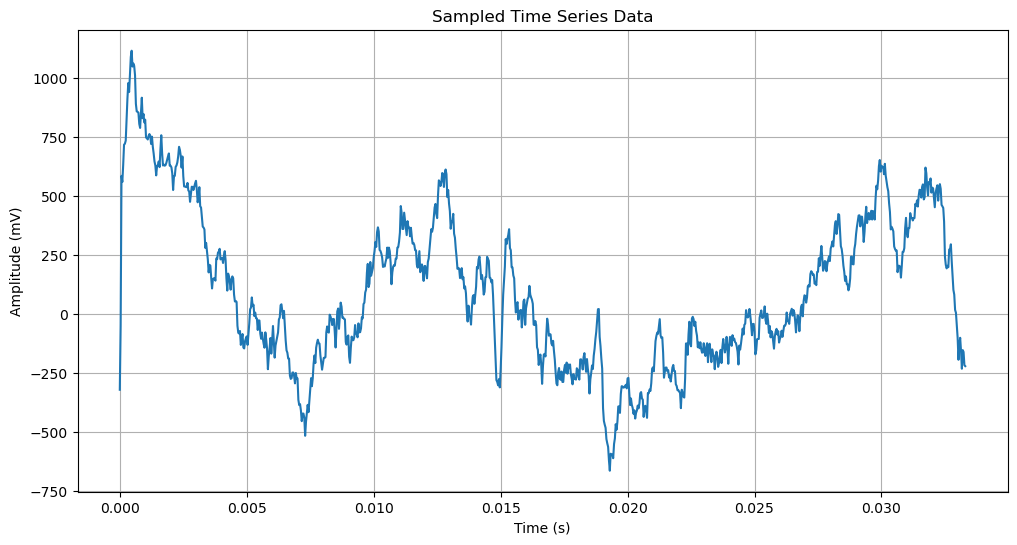

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Access TimeSeries data from acquisition
time_series_data = nwb.acquisition["time_series"].data[0:1000, 0]  # Load a subset of data
time = np.arange(0, len(time_series_data)) / nwb.acquisition["time_series"].rate  # Calculate time axis

plt.figure(figsize=(12, 6))
plt.plot(time, time_series_data)
plt.title("Sampled Time Series Data")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.grid(True)
plt.show()

## Conclusions

This notebook provides introductory exploration of Dandiset 001375, focusing on metadata extraction and a brief visualization example from the NWB data set.

Future analysis could include more advanced data processing and exploration of different NWB file elements.